In [1]:
#hide
from fastbook import *
from fastai.vision.widgets import *
%config Completer.use_jedi = False

In [2]:

#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [3]:
img = PILImage.create(btn_upload.data[-1])

<AxesSubplot:>

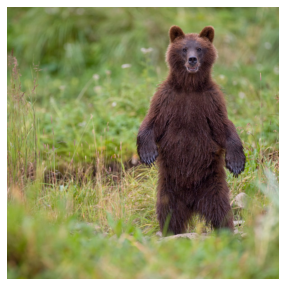

In [4]:
img.show()

In [5]:
#hide_output
# widget output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [7]:
path = Path()
learn_inf = load_learner(path/'export.pkl')

In [8]:
pred,pred_idx,probs = learn_inf.predict(img)

/home/lyft/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [11]:
#hide_output
# label to show output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly_bear; Probability: 0.8564')

In [20]:
btn_run = widgets.Button(description='Classify')

In [16]:

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [18]:
btn_upload = widgets.FileUpload()

In [19]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])